Hello World from Sue

In [0]:
import tensorflow as tf

In [0]:
helloworld=tf.constant("Hello world.")

In [4]:
with tf.Session() as sess:
  print(sess.run(helloworld))

b'Hello world.'


Add and Multiply

In [0]:
a=tf.constant(2)
b=tf.constant(3)

In [13]:
with tf.Session() as sess:
  print(sess.run(a+b))

5


In [0]:
add=tf.add(a,b)

In [15]:
with tf.Session() as sess:
  print(sess.run(add,feed_dict={a:2,b:3}))

5


In [17]:
with tf.Session() as sess:
  print(sess.run(a*b))

6


In [0]:
mul=tf.multiply(a,b)

In [19]:
with tf.Session() as sess:
  print(sess.run(mul,feed_dict={a:2,b:3}))

6


linear regression

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
learning_rate=0.1
training_epochs=200
display_step=20

In [0]:
train_X=np.asarray([2,3,5,3,4,5,3,5,7,8,4,2,5,8,5])
train_Y=np.asarray([2,3,5,3,5,6,7,5,6,7,8,9,6,5,4])
n_samples=train_X.shape[0]

In [24]:
X=tf.placeholder(float)
Y=tf.placeholder(float)
W=tf.Variable(np.random.randn(),name='weight')
b=tf.Variable(np.random.randn(),name='bias')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
pred_y=tf.add(tf.multiply(W,X),b)

In [0]:
cost = tf.reduce_sum(tf.pow(pred_y-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
init=tf.global_variables_initializer()

Epoch: 0020 cost= 2.908890963 W= 0.7959071 b= 0.6947646
Epoch: 0040 cost= 2.346056223 W= 0.6207592 b= 1.7559736
Epoch: 0060 cost= 2.034725666 W= 0.48874208 b= 2.555856
Epoch: 0080 cost= 1.864205480 W= 0.3892346 b= 3.1587644
Epoch: 0100 cost= 1.772119403 W= 0.31423143 b= 3.6132038
Epoch: 0120 cost= 1.723413944 W= 0.25769782 b= 3.9557366
Epoch: 0140 cost= 1.698465228 W= 0.2150861 b= 4.213918
Epoch: 0160 cost= 1.686342955 W= 0.18296744 b= 4.408523
Epoch: 0180 cost= 1.681002498 W= 0.15875816 b= 4.5552053
Epoch: 0200 cost= 1.679134488 W= 0.14051081 b= 4.665765
Optimization Finished!
Training cost= 1.6791345 W= 0.14051081 b= 4.665765 



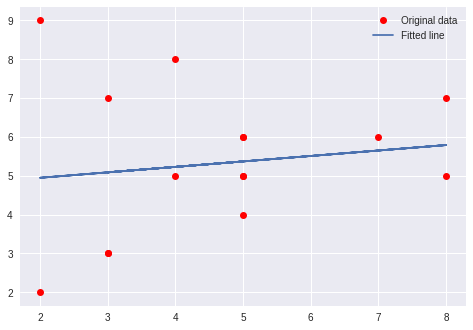

In [33]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

logistic regression

In [36]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("official/mnist/dataset.py", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting official/mnist/dataset.py/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting official/mnist/dataset.py/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting official/mnist/dataset.py/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting official/mnist/dataset.py/t10k-labels-idx1-ubyte.gz


In [0]:
# Parameters
learning_rate = 0.006
training_epochs = 66
batch_size = 30
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [45]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

Epoch: 0001 cost= 0.926269892
Epoch: 0002 cost= 0.527171369
Epoch: 0003 cost= 0.454098660
Epoch: 0004 cost= 0.419242476
Epoch: 0005 cost= 0.397389584
Epoch: 0006 cost= 0.381052485
Epoch: 0007 cost= 0.370503484
Epoch: 0008 cost= 0.360662854
Epoch: 0009 cost= 0.354834970
Epoch: 0010 cost= 0.347146955
Epoch: 0011 cost= 0.340402213
Epoch: 0012 cost= 0.338258643
Epoch: 0013 cost= 0.333304418
Epoch: 0014 cost= 0.330521983
Epoch: 0015 cost= 0.324501880
Epoch: 0016 cost= 0.324268317
Epoch: 0017 cost= 0.319949694
Epoch: 0018 cost= 0.317689955
Epoch: 0019 cost= 0.316941556
Epoch: 0020 cost= 0.313266457
Epoch: 0021 cost= 0.312367705
Epoch: 0022 cost= 0.309641012
Epoch: 0023 cost= 0.308448958
Epoch: 0024 cost= 0.306908780
Epoch: 0025 cost= 0.304593156
Epoch: 0026 cost= 0.304762499
Epoch: 0027 cost= 0.301462357
Epoch: 0028 cost= 0.301112141
Epoch: 0029 cost= 0.299973942
Epoch: 0030 cost= 0.300506853
Epoch: 0031 cost= 0.297409770
Epoch: 0032 cost= 0.296146560
Epoch: 0033 cost= 0.295239146
Epoch: 003

word2vec

In [0]:
from __future__ import division, print_function, absolute_import

import collections
import os
import random
import urllib
import zipfile

In [0]:
# Training Parameters
learning_rate = 0.1
batch_size = 128
num_steps = 3000000
display_step = 10000
eval_step = 200000

# Evaluation Parameters
eval_words = [b"science", b"physics", b"finance", b"language", b"eat", b"happy"]

# Word2Vec Parameters
embedding_size = 200 # Dimension of the embedding vector
max_vocabulary_size = 50000 # Total number of different words in the vocabulary
min_occurrence = 10 # Remove all words that does not appears at least n times
skip_window = 3 # How many words to consider left and right
num_skips = 2 # How many times to reuse an input to generate a label
num_sampled = 64 # Number of negative examples to sample

In [0]:
# Download a small chunk of Wikipedia articles collection
import urllib.request
url ='http://mattmahoney.net/dc/text8.zip'
data_path='text8.zip'
if not os.path.exists(data_path):
    print("Downloading the dataset... (It may take some time)")
    filename, _ = urllib.request.urlretrieve(url, data_path)
    print("Done!")
# Unzip the dataset file. Text has already been processed
with zipfile.ZipFile(data_path) as f:
    text_words = f.read(f.namelist()[0]).lower().split()

In [88]:
# Build the dictionary and replace rare words with UNK token
count = [('UNK', -1)]
# Retrieve the most common words
count.extend(collections.Counter(text_words).most_common(max_vocabulary_size - 1))
# Remove samples with less than 'min_occurrence' occurrences
for i in range(len(count) - 1, -1, -1):
    if count[i][1] < min_occurrence:
        count.pop(i)
    else:
        # The collection is ordered, so stop when 'min_occurrence' is reached
        break
# Compute the vocabulary size
vocabulary_size = len(count)
# Assign an id to each word
word2id = dict()
for i, (word, _)in enumerate(count):
    word2id[word] = i

data = list()
unk_count = 0
for word in text_words:
    # Retrieve a word id, or assign it index 0 ('UNK') if not in dictionary
    index = word2id.get(word, 0)
    if index == 0:
        unk_count += 1
    data.append(index)
count[0] = ('UNK', unk_count)
id2word = dict(zip(word2id.values(), word2id.keys()))

print("Words count:", len(text_words))
print("Unique words:", len(set(text_words)))
print("Vocabulary size:", vocabulary_size)
print("Most common words:", count[:10])

Words count: 17005207
Unique words: 253854
Vocabulary size: 47135
Most common words: [('UNK', 444176), (b'the', 1061396), (b'of', 593677), (b'and', 416629), (b'one', 411764), (b'in', 372201), (b'a', 325873), (b'to', 316376), (b'zero', 264975), (b'nine', 250430)]


In [0]:
data_index = 0
# Generate training batch for the skip-gram model
def next_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    # get window size (words left and right + current one)
    span = 2 * skip_window + 1
    buffer = collections.deque(maxlen=span)
    if data_index + span > len(data):
        data_index = 0
    buffer.extend(data[data_index:data_index + span])
    data_index += span
    for i in range(batch_size // num_skips):
        context_words = [w for w in range(span) if w != skip_window]
        words_to_use = random.sample(context_words, num_skips)
        for j, context_word in enumerate(words_to_use):
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[context_word]
        if data_index == len(data):
            buffer.extend(data[0:span])
            data_index = span
        else:
            buffer.append(data[data_index])
            data_index += 1
    data_index = (data_index + len(data) - span) % len(data)
    return batch, labels

In [0]:
# Input data
X = tf.placeholder(tf.int32, shape=[None])
# Input label
Y = tf.placeholder(tf.int32, shape=[None, 1])

# Ensure the following ops & var are assigned on CPU
# (some ops are not compatible on GPU)
with tf.device('/cpu:0'):
    # Create the embedding variable (each row represent a word embedding vector)
    embedding = tf.Variable(tf.random_normal([vocabulary_size, embedding_size]))
    # Lookup the corresponding embedding vectors for each sample in X
    X_embed = tf.nn.embedding_lookup(embedding, X)

    # Construct the variables for the NCE loss
    nce_weights = tf.Variable(tf.random_normal([vocabulary_size, embedding_size]))
    nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch
loss_op = tf.reduce_mean(
    tf.nn.nce_loss(weights=nce_weights,
                   biases=nce_biases,
                   labels=Y,
                   inputs=X_embed,
                   num_sampled=num_sampled,
                   num_classes=vocabulary_size))

# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluation
# Compute the cosine similarity between input data embedding and every embedding vectors
X_embed_norm = X_embed / tf.sqrt(tf.reduce_sum(tf.square(X_embed)))
embedding_norm = embedding / tf.sqrt(tf.reduce_sum(tf.square(embedding), 1, keepdims=True))
cosine_sim_op = tf.matmul(X_embed_norm, embedding_norm, transpose_b=True)

In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Testing data
    x_test = np.array([word2id[w] for w in eval_words])

    average_loss = 0
    for step in range(1, num_steps + 1):
        # Get a new batch of data
        batch_x, batch_y = next_batch(batch_size, num_skips, skip_window)
        # Run training op
        _, loss = sess.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
        average_loss += loss

        if step % display_step == 0 or step == 1:
            if step > 1:
                average_loss /= display_step
            print("Step " + str(step) + ", Average Loss= " + \
                  "{:.4f}".format(average_loss))
            average_loss = 0   

        # Evaluation
        if step % eval_step == 0 or step == 1:
            print("Evaluation...")
            sim = sess.run(cosine_sim_op, feed_dict={X: x_test})
            for i in range(len(eval_words)):
                top_k = 8  # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k + 1]
                log_str = '"%s" nearest neighbors:' % eval_words[i]
                for k in range(top_k):
                    log_str = '%s %s,' % (log_str, id2word[nearest[k]])
                print(log_str)

Step 1, Average Loss= 541.2406
Evaluation...
"b'science'" nearest neighbors: b'advocate', b'pitt', b'salutation', b'scuderia', b'harassment', b'sagittarius', b'comply', b'trouble',
"b'physics'" nearest neighbors: b'hplc', b'sieve', b'watched', b'befriended', b'veneto', b'getz', b'packets', b'bracing',
"b'finance'" nearest neighbors: b'muster', b'reactive', b'tao', b'reworking', b'gerrard', b'lieder', b'auspices', b'carries',
"b'language'" nearest neighbors: b'landmass', b'kline', b'entire', b'encountering', b'omnivorous', b'nottingham', b'neq', b'wonderswan',
"b'eat'" nearest neighbors: b'when', b'infidels', b'quarters', b'vases', b'swampy', b'premiums', b'rojcewicz', b'hadiths',
"b'happy'" nearest neighbors: b'ran', b'counteract', b'kavina', b'demi', b'bannister', b'grosso', b'growth', b'outfielder',
Step 10000, Average Loss= 201.0397
Step 20000, Average Loss= 95.8515
Step 30000, Average Loss= 64.9165
Step 40000, Average Loss= 49.8813
Step 50000, Average Loss= 41.9771
Step 60000, Aver